In [164]:
import pandas as pd
import numpy as np

In [165]:
df = pd.read_csv("https://raw.githubusercontent.com/nflverse/nfldata/master/data/games.csv")

In [166]:
df.drop(df.iloc[:, 0:7], axis=1, inplace=True)
df.drop(df.iloc[:, 8:15], axis=1, inplace=True)
df.drop(df.iloc[:, 23:32], axis=1, inplace=True)
df.drop(['surface'], axis=1, inplace=True)
df.fillna(0, inplace=True)
df.head(20)

,away_team,away_score,home_team,home_score,location,result,total,overtime,away_rest,home_rest,...,spread_line,away_spread_odds,home_spread_odds,total_line,under_odds,over_odds,div_game,roof,temp,wind
0,MIN,17.0,ATL,14.0,Home,-3.0,31.0,0.0,7,7,...,-4.0,0.0,0.0,49.0,0.0,0.0,0,dome,0.0,0.0
1,KC,17.0,CHI,20.0,Home,3.0,37.0,0.0,7,7,...,-3.0,0.0,0.0,38.0,0.0,0.0,0,outdoors,80.0,12.0
2,PIT,43.0,CLE,0.0,Home,-43.0,43.0,0.0,7,7,...,-6.0,0.0,0.0,37.0,0.0,0.0,1,outdoors,78.0,12.0
3,OAK,24.0,GB,28.0,Home,4.0,52.0,0.0,7,7,...,9.0,0.0,0.0,43.0,0.0,0.0,0,outdoors,67.0,10.0
4,BUF,14.0,IND,31.0,Home,17.0,45.0,0.0,7,7,...,-3.0,0.0,0.0,45.5,0.0,0.0,1,dome,0.0,0.0
5,SF,3.0,JAX,41.0,Home,38.0,44.0,0.0,7,7,...,5.5,0.0,0.0,49.0,0.0,0.0,0,outdoors,76.0,8.0
6,CAR,10.0,NO,19.0,Home,9.0,29.0,0.0,7,7,...,3.5,0.0,0.0,38.0,0.0,0.0,1,dome,0.0,0.0
7,NE,30.0,NYJ,28.0,Home,-2.0,58.0,0.0,7,7,...,7.0,0.0,0.0,44.5,0.0,0.0,1,outdoors,73.0,5.0
8,ARI,25.0,PHI,24.0,Home,-1.0,49.0,0.0,7,7,...,-3.0,0.0,0.0,37.0,0.0,0.0,1,outdoors,75.0,3.0
9,DET,28.0,SEA,20.0,Home,-8.0,48.0,0.0,7,7,...,9.5,0.0,0.0,42.0,0.0,0.0,0,dome,0.0,0.0


In [167]:
df.roof.replace(to_replace=dict(dome=1, outdoors=0, closed=1, open=0), inplace=True)
df.rename(columns={"roof": "indoor_game"}, inplace=True)

df['home_win'] = np.where(df['home_score'] > df['away_score'], 1, 0)
df.rename(columns={"result": "home_winning_margin"}, inplace=True)

df['over_totals_win'] = np.where(df['total'] > df['total_line'], 1, 0)
df['over_winning_margin'] = df.apply(lambda x: x['total'] - x['total_line'], axis=1)

df['home_spread_win'] = np.where(df['home_winning_margin'] > df['spread_line'], 1, 0)
df['home_spread_winning_margin'] = df.apply(lambda x: x['home_winning_margin'] - x['spread_line'], axis=1)

C:\Users\Mark\AppData\Local\Temp\ipykernel_8492\2086745645.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.roof.replace(to_replace=dict(dome=1, outdoors=0, closed=1, open=0), inplace=True)
C:\Users\Mark\AppData\Local\Temp\ipykernel_8492\2086745645.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', Tr

In [168]:
df1 = df.iloc[6460]
df1

away_team                       LAC
away_score                     28.0
home_team                       MIN
home_score                     24.0
location                       Home
home_winning_margin            -4.0
total                          52.0
overtime                        0.0
away_rest                         7
home_rest                        10
away_moneyline               -110.0
home_moneyline               -110.0
spread_line                     1.0
away_spread_odds             -115.0
home_spread_odds             -105.0
total_line                     54.0
under_odds                   -110.0
over_odds                    -110.0
div_game                          0
indoor_game                       1
temp                            0.0
wind                            0.0
home_win                          0
over_totals_win                   0
over_winning_margin            -2.0
home_spread_win                   0
home_spread_winning_margin     -5.0
Name: 6460, dtype: object

In [169]:
df.describe(include=[np.number])

,away_score,home_score,home_winning_margin,total,overtime,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,...,over_odds,div_game,indoor_game,temp,wind,home_win,over_totals_win,over_winning_margin,home_spread_win,home_spread_winning_margin
count,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,...,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000,6978.000000
mean,20.060332,22.328891,2.268558,42.389223,0.058899,7.473345,7.515621,58.180138,-92.628977,2.282531,...,-57.279736,0.377472,0.246489,40.120952,5.904987,0.542992,0.465033,-1.148682,0.470335,-0.013972
std,10.662743,11.068656,14.336087,16.336923,0.235453,1.982782,2.092829,242.422769,277.724551,5.893971,...,69.812454,0.484789,0.430997,30.232845,5.983662,0.498184,0.498812,15.942847,0.499155,13.027055
min,0.000000,0.000000,-49.000000,0.000000,0.000000,4.000000,4.000000,-1500.000000,-5000.000000,-19.000000,...,-125.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,0.000000,-51.000000,0.000000,-52.000000
25%,13.000000,15.000000,-6.000000,33.000000,0.000000,7.000000,7.000000,-107.000000,-209.000000,-2.500000,...,-108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.000000,0.000000,-8.000000
50%,20.000000,23.000000,3.000000,43.000000,0.000000,7.000000,7.000000,0.000000,0.000000,3.000000,...,-103.000000,0.000000,0.000000,48.000000,5.000000,1.000000,0.000000,-1.000000,0.000000,-0.500000
75%,27.000000,30.000000,10.000000,52.000000,0.000000,7.000000,7.000000,186.000000,0.000000,6.500000,...,0.000000,1.000000,0.000000,65.000000,10.000000,1.000000,1.000000,9.000000,1.000000,8.000000
max,59.000000,70.000000,59.000000,106.000000,1.000000,21.000000,16.000000,2173.000000,1100.000000,27.000000,...,113.000000,1.000000,1.000000,109.000000,71.000000,1.000000,1.000000,68.500000,1.000000,49.500000


In [170]:
df.describe(include=[object]) 

,away_team,home_team,location
count,6978,6978,6978
unique,35,35,2
top,BAL,NE,Home
freq,231,239,6894


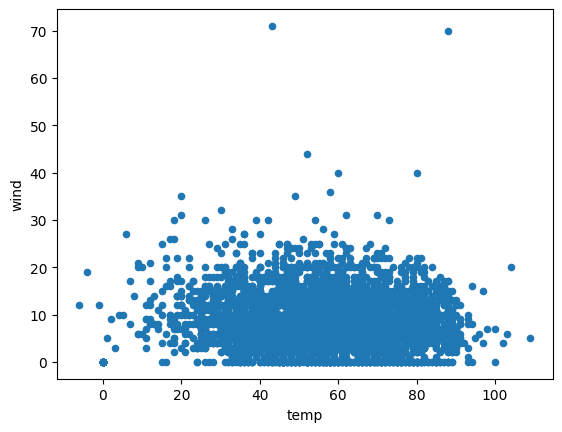

In [171]:
import matplotlib.pyplot as plt
df.plot(kind= 'scatter', x='temp', y='wind')

plt.show()

In [172]:
indoor_df = df[df['indoor_game'] == 1]
indoor_df

,away_team,away_score,home_team,home_score,location,home_winning_margin,total,overtime,away_rest,home_rest,...,over_odds,div_game,indoor_game,temp,wind,home_win,over_totals_win,over_winning_margin,home_spread_win,home_spread_winning_margin
0,MIN,17.0,ATL,14.0,Home,-3.0,31.0,0.0,7,7,...,0.0,0,1,0.0,0.0,0,0,-18.0,1,1.0
4,BUF,14.0,IND,31.0,Home,17.0,45.0,0.0,7,7,...,0.0,1,1,0.0,0.0,1,0,-0.5,1,20.0
6,CAR,10.0,NO,19.0,Home,9.0,29.0,0.0,7,7,...,0.0,1,1,0.0,0.0,1,0,-9.0,1,5.5
9,DET,28.0,SEA,20.0,Home,-8.0,48.0,0.0,7,7,...,0.0,0,1,0.0,0.0,0,1,6.0,0,-17.5
10,BAL,10.0,STL,27.0,Home,17.0,37.0,0.0,7,7,...,0.0,0,1,0.0,0.0,1,0,-2.0,1,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6965,WAS,0.0,DAL,0.0,Home,0.0,0.0,0.0,7,7,...,-110.0,1,1,0.0,0.0,0,0,-46.5,0,-5.5
6967,MIN,0.0,DET,0.0,Home,0.0,0.0,0.0,7,6,...,-110.0,1,1,0.0,0.0,0,0,-47.0,0,-5.5
6969,JAX,0.0,IND,0.0,Home,0.0,0.0,0.0,7,7,...,-108.0,1,1,0.0,0.0,0,0,-46.5,0,-2.0
6970,SEA,0.0,LA,0.0,Home,0.0,0.0,0.0,10,7,...,-110.0,1,1,0.0,0.0,0,0,-47.0,0,-5.5


In [173]:
outdoor_df = df[df['indoor_game'] == 0]
outdoor_df

,away_team,away_score,home_team,home_score,location,home_winning_margin,total,overtime,away_rest,home_rest,...,over_odds,div_game,indoor_game,temp,wind,home_win,over_totals_win,over_winning_margin,home_spread_win,home_spread_winning_margin
1,KC,17.0,CHI,20.0,Home,3.0,37.0,0.0,7,7,...,0.0,0,0,80.0,12.0,1,0,-1.0,1,6.0
2,PIT,43.0,CLE,0.0,Home,-43.0,43.0,0.0,7,7,...,0.0,1,0,78.0,12.0,0,1,6.0,0,-37.0
3,OAK,24.0,GB,28.0,Home,4.0,52.0,0.0,7,7,...,0.0,0,0,67.0,10.0,1,1,9.0,0,-5.0
5,SF,3.0,JAX,41.0,Home,38.0,44.0,0.0,7,7,...,0.0,0,0,76.0,8.0,1,0,-5.0,1,32.5
7,NE,30.0,NYJ,28.0,Home,-2.0,58.0,0.0,7,7,...,0.0,1,0,73.0,5.0,0,1,13.5,0,-9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6973,MIA,0.0,NYJ,0.0,Home,0.0,0.0,0.0,7,7,...,-110.0,1,0,0.0,0.0,0,0,-45.0,0,-3.0
6974,NYG,0.0,PHI,0.0,Home,0.0,0.0,0.0,7,7,...,-110.0,1,0,0.0,0.0,0,0,-43.0,0,-5.0
6975,CIN,0.0,PIT,0.0,Home,0.0,0.0,0.0,7,11,...,-108.0,1,0,0.0,0.0,0,0,-43.5,1,1.0
6976,NO,0.0,TB,0.0,Home,0.0,0.0,0.0,7,7,...,-108.0,1,0,0.0,0.0,0,0,-43.0,0,-2.5


In [174]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()
scaler = StandardScaler()

In [175]:
indoor_df['home_team'] = label_encoder.fit_transform(indoor_df['home_team'])
indoor_df['away_team'] = label_encoder.fit_transform(indoor_df['away_team'])
#df['surface'] = label_encoder.fit_transform(df['surface'])
indoor_df['location'] = label_encoder.fit_transform(indoor_df['location'])

C:\Users\Mark\AppData\Local\Temp\ipykernel_8492\324121571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indoor_df['home_team'] = label_encoder.fit_transform(indoor_df['home_team'])
C:\Users\Mark\AppData\Local\Temp\ipykernel_8492\324121571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indoor_df['away_team'] = label_encoder.fit_transform(indoor_df['away_team'])
C:\Users\Mark\AppData\Local\Temp\ipykernel_8492\324121571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [176]:
outdoor_df['home_team'] = label_encoder.fit_transform(outdoor_df['home_team'])
outdoor_df['away_team'] = label_encoder.fit_transform(outdoor_df['away_team'])
#df['surface'] = label_encoder.fit_transform(df['surface'])
outdoor_df['location'] = label_encoder.fit_transform(outdoor_df['location'])

C:\Users\Mark\AppData\Local\Temp\ipykernel_8492\3540021076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdoor_df['home_team'] = label_encoder.fit_transform(outdoor_df['home_team'])
C:\Users\Mark\AppData\Local\Temp\ipykernel_8492\3540021076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdoor_df['away_team'] = label_encoder.fit_transform(outdoor_df['away_team'])
C:\Users\Mark\AppData\Local\Temp\ipykernel_8492\3540021076.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [177]:
# removed temp and wind columns as they are irrelant for indoor games
indoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','home_win','home_spread_win','home_spread_winning_margin']] = \
    scaler.fit_transform(indoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','home_win','home_spread_win','home_spread_winning_margin']])

C:\Users\Mark\AppData\Local\Temp\ipykernel_8492\744768695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','home_win','home_spread_win','home_spread_winning_margin']] = \


In [178]:
# removed temp and wind columns as they are irrelant for indoor games
outdoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','temp','wind','home_win','home_spread_win','home_spread_winning_margin']] = \
    scaler.fit_transform(outdoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','temp','wind','home_win','home_spread_win','home_spread_winning_margin']])

C:\Users\Mark\AppData\Local\Temp\ipykernel_8492\2244634949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdoor_df[['away_score','home_score','home_winning_margin','total','overtime','away_rest','home_rest','away_moneyline','home_moneyline','spread_line','away_spread_odds','home_spread_odds','total_line','under_odds','over_odds','div_game','temp','wind','home_win','home_spread_win','home_spread_winning_margin']] = \


In [179]:
from sklearn.model_selection import train_test_split

indoor_X_train, indoor_X_test, indoor_y_train, indoor_y_test = train_test_split(indoor_df.drop(['over_totals_win','away_score','home_score','total','over_winning_margin', 'temp', 'wind', 'indoor_game'], axis=1), indoor_df['over_totals_win'], test_size=0.15)

In [180]:
from sklearn.model_selection import train_test_split

outdoor_X_train, outdoor_X_test, outdoor_y_train, outdoor_y_test = train_test_split(outdoor_df.drop(['over_totals_win','away_score','home_score','total','over_winning_margin', 'indoor_game'], axis=1), outdoor_df['over_totals_win'], test_size=0.15)

In [181]:
indoor_X_train

,away_team,home_team,location,home_winning_margin,overtime,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,away_spread_odds,home_spread_odds,total_line,under_odds,over_odds,div_game,home_win,home_spread_win,home_spread_winning_margin
4935,34,15,0,0.064535,3.902104,-0.213843,-0.221009,1.089809,-1.024194,1.231788,-0.813685,1.724218,1.484430,-0.650558,-0.605229,-0.761203,0.946764,-0.948974,-0.492886
4864,10,15,0,0.856873,-0.256272,-0.213843,3.088634,0.630177,-0.528510,0.631791,-0.837831,1.748009,1.046316,-0.596044,-0.663690,-0.761203,0.946764,1.053769,0.643422
5764,14,13,0,0.064535,3.902104,-0.213843,-0.221009,1.304866,-1.348294,1.403216,-0.874050,1.783695,1.155844,2.184183,-0.736767,-0.761203,0.946764,-0.948974,-0.571253
2821,21,15,0,1.361089,-0.256272,0.288629,0.251797,0.254881,-0.131964,-0.225348,1.866521,-0.892739,2.470187,2.211440,-0.751382,-0.761203,0.946764,1.053769,1.583816
1240,29,13,0,1.793274,-0.256272,-0.213843,-0.221009,-0.234268,0.348468,-0.568203,0.550564,0.510902,1.484430,0.780441,0.929384,-0.761203,0.946764,1.053769,2.210745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6531,22,8,0,-0.943897,-0.256272,1.293573,-0.221009,-0.782453,0.767893,-0.739631,-0.777466,-0.797577,-0.487084,-0.718701,-0.678305,-0.761203,-1.056230,-0.948974,-0.688802
1480,22,1,0,0.064535,-0.256272,-0.213843,-0.221009,-0.234268,0.348468,1.146074,0.550564,0.510902,0.389145,0.780441,0.929384,1.313709,0.946764,-0.948974,-0.453703
2652,24,7,0,-1.376082,-0.256272,-0.213843,-0.221009,0.613310,-0.517071,0.374649,-0.692955,-0.738101,-0.268026,2.156926,-0.692921,-0.761203,-1.056230,-0.948974,-1.668378
1932,27,1,0,0.064535,3.902104,-0.213843,-0.221009,-0.887873,0.901346,-0.825345,-0.946488,1.890752,-1.363312,-0.745958,2.420150,-0.761203,0.946764,1.053769,0.447507


In [182]:
indoor_X_train.corr()

,away_team,home_team,location,home_winning_margin,overtime,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,away_spread_odds,home_spread_odds,total_line,under_odds,over_odds,div_game,home_win,home_spread_win,home_spread_winning_margin
away_team,1.000000,-0.094000,0.005681,-0.045244,-0.000316,-0.012086,-0.013246,-0.004875,-0.001197,-0.057022,-0.013657,0.012572,-0.014420,-0.030591,-0.009246,0.023955,-0.045423,-0.026533,-0.023452
home_team,-0.094000,1.000000,0.037022,0.059632,-0.034296,0.051710,0.022610,-0.017990,0.025806,0.108371,0.066774,0.083411,0.029070,0.053709,0.102526,-0.000234,0.052873,0.009648,0.015850
location,0.005681,0.037022,1.000000,-0.019261,0.024873,0.197122,0.181885,-0.010559,0.012571,-0.033517,0.011685,-0.028387,0.026619,-0.007043,-0.022043,-0.057626,-0.038956,-0.014554,-0.005793
home_winning_margin,-0.045244,0.059632,-0.019261,1.000000,-0.037290,-0.004720,0.039365,0.310094,-0.297469,0.398000,-0.020279,0.059950,0.060477,0.012975,0.014473,0.000902,0.757536,0.668264,0.909374
overtime,-0.000316,-0.034296,0.024873,-0.037290,1.000000,0.027242,-0.004298,0.008751,-0.000517,-0.014712,-0.015307,0.002572,0.000354,0.003205,0.004165,0.046148,-0.002414,-0.065574,-0.033970
away_rest,-0.012086,0.051710,0.197122,-0.004720,0.027242,1.000000,0.309773,-0.000801,-0.000149,0.011597,0.006634,-0.016740,0.025884,-0.016945,-0.016385,-0.032619,0.014492,0.003874,-0.010403
home_rest,-0.013246,0.022610,0.181885,0.039365,-0.004298,0.309773,1.000000,0.062930,-0.054515,0.090490,0.055500,-0.000187,0.039495,0.015083,-0.024833,-0.087195,0.030035,-0.006249,0.001869
away_moneyline,-0.004875,-0.017990,-0.010559,0.310094,0.008751,-0.000801,0.062930,1.000000,-0.968032,0.809614,-0.125127,0.090301,0.043614,-0.009508,-0.087604,0.011942,0.288353,-0.085600,-0.029159
home_moneyline,-0.001197,0.025806,0.012571,-0.297469,-0.000517,-0.000149,-0.054515,-0.968032,1.000000,-0.768765,0.141451,-0.056465,-0.041157,0.041408,0.125604,-0.000001,-0.263942,0.070817,0.024395
spread_line,-0.057022,0.108371,-0.033517,0.398000,-0.014712,0.011597,0.090490,0.809614,-0.768765,1.000000,-0.096070,0.181129,0.061259,0.071007,0.032832,0.017497,0.346461,-0.086549,-0.019683


In [183]:
indoor_y_train

4935    1
4864    1
5764    0
2821    0
1240    0
       ..
6531    1
1480    0
2652    0
1932    1
6600    0
Name: over_totals_win, Length: 1462, dtype: int32

In [184]:
indoor_X_test

,away_team,home_team,location,home_winning_margin,overtime,away_rest,home_rest,away_moneyline,home_moneyline,spread_line,away_spread_odds,home_spread_odds,total_line,under_odds,over_odds,div_game,home_win,home_spread_win,home_spread_winning_margin
6422,4,1,0,0.856873,-0.256272,-0.213843,-0.221009,0.440421,-0.383618,0.203222,-0.753320,-0.821368,-1.144255,-0.718701,-0.678305,1.313709,0.946764,1.053769,0.839338
2800,0,20,0,-0.727804,-0.256272,-0.213843,-0.221009,-1.836655,1.606741,-2.025339,1.830302,-0.857054,0.170088,-0.705072,-0.546767,1.313709,-1.056230,1.053769,0.134043
2410,15,1,0,1.577182,-0.256272,-0.213843,-0.221009,-0.234268,0.348468,0.717505,0.550564,0.510902,-1.910954,0.780441,0.929384,-0.761203,0.946764,1.053769,1.387900
420,4,13,0,0.856873,-0.256272,-0.213843,-0.221009,-0.234268,0.348468,1.231788,0.550564,0.510902,0.170088,0.780441,0.929384,-0.761203,0.946764,1.053769,0.369141
6597,15,12,0,-1.159989,-0.256272,-0.716315,-0.221009,-2.342672,1.797389,-1.939625,-0.777466,-0.797577,-0.706141,-0.745958,-0.649075,1.313709,-1.056230,-0.948974,-0.375337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6012,6,12,0,-1.520143,-0.256272,3.303461,-0.221009,-0.752935,0.775518,-0.568203,-0.837831,1.759904,1.046316,-0.718701,-0.546767,-0.761203,-1.056230,-0.948974,-1.394097
5484,4,15,0,0.064535,-0.256272,-0.213843,-0.221009,1.342818,-1.394050,1.317502,-0.753320,-0.702415,0.060559,-0.827729,2.478611,1.313709,0.946764,-0.948974,-0.532070
3386,23,4,0,-0.367650,-0.256272,-0.213843,-0.221009,0.575359,-0.467503,0.374649,-0.668809,-0.761892,0.608202,-0.623301,-0.634459,1.313709,-1.056230,-0.948974,-0.571253
3231,10,4,0,-0.439681,-0.256272,-0.213843,-0.693816,0.271749,-0.158654,0.031794,-0.705028,-0.726206,0.060559,-0.623301,-0.634459,-0.761203,-1.056230,-0.948974,-0.492886


In [185]:
indoor_y_test

6422    0
2800    0
2410    1
420     1
6597    1
       ..
6012    0
5484    1
3386    1
3231    1
4352    0
Name: over_totals_win, Length: 258, dtype: int32

In [186]:
from sklearn.linear_model import LogisticRegression

# Train the logistic regression indoor_model
indoor_model = LogisticRegression()
indoor_model.fit(indoor_X_train, indoor_y_train)
print(indoor_model.score(indoor_X_test, indoor_y_test)) 

C:\Users\Mark\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5426356589147286


In [187]:
from sklearn.linear_model import LogisticRegression

# Train the logistic regression indoor_model
outdoor_model = LogisticRegression()
outdoor_model.fit(outdoor_X_train, outdoor_y_train)
print(outdoor_model.score(outdoor_X_test, outdoor_y_test)) 

0.5576679340937896


C:\Users\Mark\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [190]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from tabulate import tabulate

indoor_y_pred = indoor_model.predict(indoor_X_test)
outdoor_y_pred = outdoor_model.predict(outdoor_X_test)

print(tabulate(
    [
        ['Indoor', accuracy_score(indoor_y_test, indoor_y_pred), precision_score(indoor_y_test, indoor_y_pred), recall_score(indoor_y_test, indoor_y_pred)], 
        ['Outdoor', accuracy_score(outdoor_y_test, outdoor_y_pred), precision_score(outdoor_y_test, outdoor_y_pred), recall_score(outdoor_y_test, outdoor_y_pred)]
    ], headers=['Model', 'Accuracy score', 'Precision score', 'Recall score'], tablefmt='orgtbl'
))


Indoor Accuracy: 0.54
Outdoor Accuracy: 0.56
Indoor Precision: 0.58
Outdoor Precision: 0.50
Indoor Recall: 0.34
Outdoor Recall: 0.29
| Model   |   Accuracy score |   Precision score |   Recall score |
|---------+------------------+-------------------+----------------|
| Indoor  |         0.542636 |          0.584416 |       0.343511 |
| Outdoor |         0.557668 |          0.50495  |       0.290598 |
